In [1]:
#Dependencies
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
from Passwords import pgAdmin_pwd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Postgres address, port, username, password, and database name
POSTGRES_ADDRESS = 'localhost'
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres' 
POSTGRES_PASSWORD = pgAdmin_pwd
POSTGRES_DBNAME = 'SQL_HW'

postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format
                (username=POSTGRES_USERNAME,
                 password=POSTGRES_PASSWORD,
                 ipaddress=POSTGRES_ADDRESS,
                 port=POSTGRES_PORT,
                 dbname=POSTGRES_DBNAME))

#Create the connection
engine = create_engine(postgres_str)

In [3]:
#Read employees table
employ_df = pd.read_sql_table('employees',engine)
employ_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [4]:
#Read salaries table
salary_df = pd.read_sql_table('salaries', engine)
salary_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [5]:
#Read titles table
title_df = pd.read_sql_table('titles', engine)
title_df.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [6]:
#Merge employees and salaries tables
merge1_df = pd.merge(employ_df, salary_df, on="emp_no")
merge1_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [7]:
#Merge in the titles table
merge2_df = pd.merge(merge1_df, title_df, left_on="emp_title_id", right_on="title_id")
merge2_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title_id,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,s0001,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,s0001,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,s0001,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,s0001,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,s0001,Staff


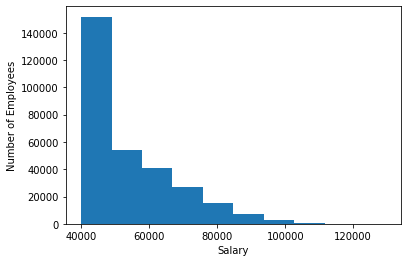

In [8]:
#Create histogram of employee salary ranges
plt.hist(merge2_df.salary)
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.show()

In [9]:
#Group by titles and calculate the average salary by title
title_group = merge2_df.groupby(['title'])
avg_salary = title_group["salary"].mean()

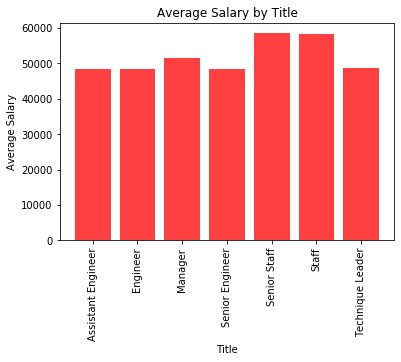

In [10]:
#Plot the average salary by title
x_axis = np.arange(len(avg_salary))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, avg_salary, color='r', alpha=0.75, align="center")
plt.xticks(tick_locations, ["Assistant Engineer", "Engineer", "Manager", "Senior Engineer", "Senior Staff", "Staff", "Technique Leader"], rotation='vertical')
plt.title("Average Salary by Title")
plt.xlabel("Title")
plt.ylabel("Average Salary")
plt.show()